# Bootcamp: Cientista de Dados - Desafio

- Data: junho de 2022.

## Autor

Feito com por [Alexsander Lopes Camargos](https://github.com/alexcamargos): Entre em contato!

[![GitHub](https://img.shields.io/badge/-AlexCamargos-1ca0f1?style=flat-square&labelColor=1ca0f1&logo=github&logoColor=white&link=https://github.com/alexcamargos)](https://github.com/alexcamargos)
[![Twitter Badge](https://img.shields.io/badge/-@alcamargos-1ca0f1?style=flat-square&labelColor=1ca0f1&logo=twitter&logoColor=white&link=https://twitter.com/alcamargos)](https://twitter.com/alcamargos)
[![Linkedin Badge](https://img.shields.io/badge/-alexcamargos-1ca0f1?style=flat-square&logo=Linkedin&logoColor=white&link=https://www.linkedin.com/in/alexcamargos/)](https://www.linkedin.com/in/alexcamargos/)
[![Gmail Badge](https://img.shields.io/badge/-alcamargos@vivaldi.net-1ca0f1?style=flat-square&labelColor=1ca0f1&logo=Gmail&logoColor=white&link=mailto:alcamargos@vivaldi.net)](mailto:alcamargos@vivaldi.net)

## Licença

[MIT License](https://choosealicense.com/licenses/mit/)

## Módulo 3 - Técnicas para o Processamento do Big Data

## Objetivos

Exercitar os seguintes conceitos trabalhados no Módulo:

- Pré-processamento dos dados.
- Detecção de anomalias.
- Processamento dos dados.
- Correlações.
- Spark MlLib.

## Enunciado

A análise de dados é a ciência que estuda e interpreta os dados, a fim de possibilitar a tomada de decisão mais assertiva. Por meio da análise de dados, é possível identificar oportunidades, prever o impacto de decisões, escolher qual investimento é mais lucrativo e conhecer melhor o cliente.

Nesse sentido, coletar e analisar dados sobre os consumidores e o público-alvo de um negócio é essencial para garantir que as necessidades dos clientes sejam atendidas. Logo, empregar técnicas como a segmentação de clientes auxilia na tarefa de aproximar e alinhar expectativas. Assim, é possível aumentar a competitividade do negócio e a satisfação dos consumidores.

Neste desafio, vamos realizar uma análise sobre um banco de dados composto por clientes de um shopping. Nessa análise, vamos tentar compreender melhor quais são as características dos nossos consumidores. Para isso, vamos aplicar diferentes técnicas estatísticas, como correlação e regressão para identificar possíveis tendências e relacionamentos nos dados, investigar anomalias e aplicar o algoritmo K-means para dividir o conjunto de clientes em grupos com características similares. Portanto, será possível identificar as particularidades de cada um desses segmentos de clientes e poder oferecer produtos e serviços que atendam às necessidades de cada grupo.

In [0]:
# Importando os módulos necessários.
from pyspark import SparkFiles
from pyspark.sql import SparkSession

from pyspark.sql import functions as sql_F

In [0]:
# Criando o SparkSession
spark  = SparkSession.builder.appName('Desafio do Módulo 3').getOrCreate()
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.2.1 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
# Link para o dataset no Github
DATASET_LINK = 'https://raw.githubusercontent.com/alexcamargos/DataScienceBootcampIGTI/main/Modulo_3/Desafio/mall_customers.csv'

In [0]:
# Informando ao Spark onde esta o arquivo para download.
spark.sparkContext.addFile(DATASET_LINK)

In [0]:
# Carregando o dataset. Nosso arquivo CSV tem cabeçalho definido e usa encoding Windows-1252.
#header=True - Indica que a primeira linha do arquivo é o cabeçalho.
# inferSchema=True - Tenta determinar o schema a partir dos dados.
df = spark.read.option('header', True) \
               .option('inferSchema', 'True') \
               .csv(f'file://{SparkFiles.get("mall_customers.csv")}')

In [0]:
# Visualizando o dataframe.
df.show(5)

+----------+------+---+------------------+----------------------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
+----------+------+---+------------------+----------------------+
only showing top 5 rows



In [0]:
# Visualizando o esquema inferido de forma automática para as colunas.
df.printSchema()

root
 |-- CustomerID: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual Income (k$): integer (nullable = true)
 |-- Spending Score (1-100): integer (nullable = true)



In [0]:
# Quais são as colunas do dataframe.
df.columns

Out[8]: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [0]:
# Verificando a existência ou não de valores nulos no dataframe.
df.select([sql_F.count(sql_F.when(sql_F.isnan(column), column)).alias(column) for column in df.columns]).show(vertical=True)

-RECORD 0---------------------
 CustomerID             | 0   
 Genre                  | 0   
 Age                    | 0   
 Annual Income (k$)     | 0   
 Spending Score (1-100) | 0   



In [0]:
# Estatísticas descritiva dos dataframe.
df.describe().show()

+-------+------------------+------+-----------------+------------------+----------------------+
|summary|        CustomerID| Genre|              Age|Annual Income (k$)|Spending Score (1-100)|
+-------+------------------+------+-----------------+------------------+----------------------+
|  count|               200|   200|              200|               200|                   200|
|   mean|             100.5|  null|            38.85|             60.56|                  50.2|
| stddev|57.879184513951124|  null|13.96900733155888| 26.26472116527124|    25.823521668370173|
|    min|                 1|Female|               18|                15|                     1|
|    max|               200|  Male|               70|               137|                    99|
+-------+------------------+------+-----------------+------------------+----------------------+



# Pergunta 1

Quantas instâncias (linhas) e características (colunas) existem, respectivamente, no dataset?

In [0]:
print(f'Nosso dataframe tem {df.count()} linhas.')
print(f'Nosso dataframe tem {len(df.columns)} colunas.')

Nosso dataframe tem 200 linhas.
Nosso dataframe tem 5 colunas.


# Pergunta 2

Quantas variáveis do tipo “string” estão presentes no dataset?

In [0]:
[column for column, dtypes in df.dtypes if dtypes == 'string']

Out[12]: ['Genre']

# Pergunta 3

Qual é a idade (age) média dos consumidores?

In [0]:
df.agg({'Age': 'mean'}).show()

+--------+
|avg(Age)|
+--------+
|   38.85|
+--------+



In [0]:
df.select('Age').describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|              200|
|   mean|            38.85|
| stddev|13.96900733155888|
|    min|               18|
|    max|               70|
+-------+-----------------+



In [0]:
df.select(sql_F.mean('Age')).show()

+--------+
|avg(Age)|
+--------+
|   38.85|
+--------+



# Pergunta 4

Qual é o desvio padrão para os salários anuais (Annual Income (K$)) dos consumidores em K$?

In [0]:
df.agg({'Annual Income (k$)': 'stddev'}).show()

+--------------------------+
|stddev(Annual Income (k$))|
+--------------------------+
|         26.26472116527124|
+--------------------------+



In [0]:
df.select('Annual Income (k$)').describe().show()

+-------+------------------+
|summary|Annual Income (k$)|
+-------+------------------+
|  count|               200|
|   mean|             60.56|
| stddev| 26.26472116527124|
|    min|                15|
|    max|               137|
+-------+------------------+



In [0]:
df.select(sql_F.stddev('Annual Income (k$)')).show()

+-------------------------------+
|stddev_samp(Annual Income (k$))|
+-------------------------------+
|              26.26472116527124|
+-------------------------------+



# Pergunta 5

Marque a opção que apresenta a afirmação CORRETA sobre possíveis outliers para a variável salário anual (Annual Income K$).

In [0]:
display(df.select('Annual Income (k$)'))

Annual Income (k$)
15
15
16
16
17
17
18
18
19
19


In [0]:
display(df.select('Annual Income (k$)'))

Annual Income (k$)
15
15
16
16
17
17
18
18
19
19


# Pergunta 6

Marque a afirmação CORRETA acerca da distribuição salarial anual (Annual Income K$) e o sexo (Genre) dos consumidores, presentes no dataset Mall_Custumers.csv.

In [0]:
df.groupBy('Genre').agg({'Annual Income (k$)': 'mean'}).show()

+------+-----------------------+
| Genre|avg(Annual Income (k$))|
+------+-----------------------+
|Female|                  59.25|
|  Male|      62.22727272727273|
+------+-----------------------+



# Pergunta 7

A variável “Spending Score (1-100)” indica o quanto o consumidor é “lucrativo” para o shopping. Assim, quanto mais próximo de 100, mais “lucrativo” é o consumidor. Analisando a relação entre o sexo (Genre), o salário anual (Annual Income) e o “Spending Score”, marque a opção CORRETA.

In [0]:
df.groupBy('Genre').mean().show()

+------+------------------+------------------+-----------------------+---------------------------+
| Genre|   avg(CustomerID)|          avg(Age)|avg(Annual Income (k$))|avg(Spending Score (1-100))|
+------+------------------+------------------+-----------------------+---------------------------+
|Female|           97.5625|38.098214285714285|                  59.25|         51.526785714285715|
|  Male|104.23863636363636| 39.80681818181818|      62.22727272727273|          48.51136363636363|
+------+------------------+------------------+-----------------------+---------------------------+



# Pergunta 8

Mesmo com o coeficiente de “Pearson” não sendo muito alto, ainda é possível identificar algum tipo de relacionamento linear. Comparando o coeficiente de correlação de “Pearson” entre as variáveis idade (“Age”) e a pontuação de consumo (“Spending Score”), é CORRETO afirmar:

In [0]:
df.stat.corr('Age', 'Spending Score (1-100)', method='pearson')

Out[23]: -0.32722684603909025

# Pergunta 9

Após separar o dataset entre homens (male) e mulheres (female), e aplicar, novamente, a análise de correlação de “Pearson” entre as variáveis idade (“Age”) e pontuação de consumo (“Spending Score”), é CORRETO afirmar:

In [0]:
df.groupBy('Genre').agg(sql_F.corr('Age', 'Spending Score (1-100)')).show()

+------+---------------------------------+
| Genre|corr(Age, Spending Score (1-100))|
+------+---------------------------------+
|Female|              -0.3754385837780473|
|  Male|             -0.27962764627493125|
+------+---------------------------------+



# Pergunta 10

Sobre o algoritmo K-means presente no arquivo desafio_bootcamp_TPD.ipynb, é CORRETO dizer:

Aplicando o algoritmo K-means

In [0]:
# Método utilizado para a avaliação dos clusters
from pyspark.ml.evaluation import ClusteringEvaluator

# Método utilizado para a criação do modelo de clusterização utilizando algoritmo K-means.
from pyspark.ml.clustering import KMeans 

# Método utilizado para criar vetores de características.
from pyspark.ml.feature import VectorAssembler


In [0]:
input_columns = ['Spending Score (1-100)', 'Annual Income (k$)']
vector_assembler = VectorAssembler(inputCols=input_columns, outputCol='features')

In [0]:
df_transform = vector_assembler.transform(df)
df_transform.select('features').show(5)

+-----------+
|   features|
+-----------+
|[39.0,15.0]|
|[81.0,15.0]|
| [6.0,16.0]|
|[77.0,16.0]|
|[40.0,17.0]|
+-----------+
only showing top 5 rows



In [0]:
kmeans = KMeans(k=5, seed=1)
model = kmeans.fit(df_transform.select('features'))

In [0]:
model.summary.cluster.groupBy('prediction').count().show()

/databricks/spark/python/pyspark/sql/context.py:134: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
+----------+-----+
|prediction|count|
+----------+-----+
|         1|   39|
|         3|   81|
|         4|   23|
|         2|   22|
|         0|   35|
+----------+-----+



In [0]:
df_prediction = model.transform(df_transform)
df_prediction.select('features', 'prediction').show(5)

+-----------+----------+
|   features|prediction|
+-----------+----------+
|[39.0,15.0]|         4|
|[81.0,15.0]|         2|
| [6.0,16.0]|         4|
|[77.0,16.0]|         2|
|[40.0,17.0]|         4|
+-----------+----------+
only showing top 5 rows



In [0]:
display(df_prediction.groupBy('prediction').count())

prediction,count
1,39
3,81
4,23
2,22
0,35


In [0]:
df_pandas = df_prediction.toPandas().set_index('CustomerID')
df_pandas.head()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


,Genre,Age,Annual Income (k$),Spending Score (1-100),features,prediction
CustomerID,,,,,,
1,Male,19,15,39,"[39.0, 15.0]",4
2,Male,21,15,81,"[81.0, 15.0]",2
3,Female,20,16,6,"[6.0, 16.0]",4
4,Female,23,16,77,"[77.0, 16.0]",2
5,Female,31,17,40,"[40.0, 17.0]",4


In [0]:
import matplotlib.pyplot as plt

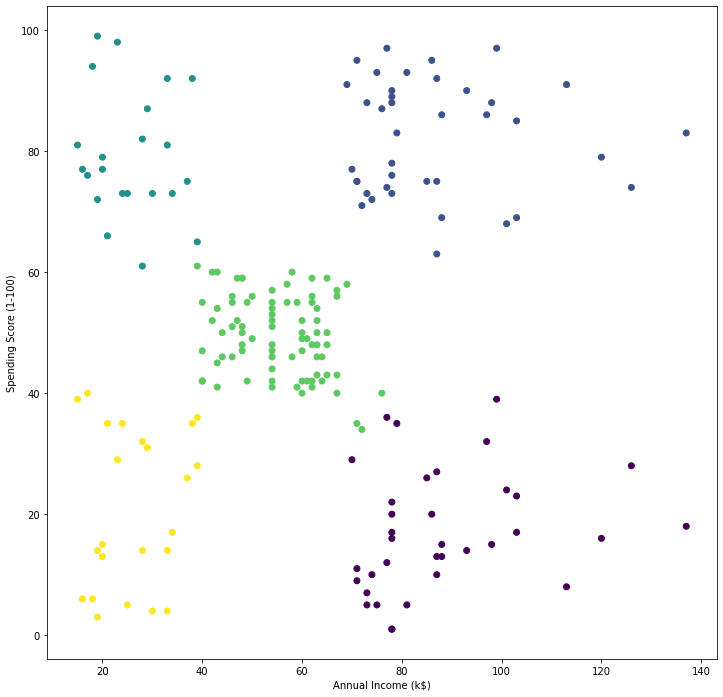

In [0]:
plt.figure(figsize=(12,12))
plt.scatter(df_pandas['Annual Income (k$)'], df_pandas['Spending Score (1-100)'], c=df_pandas.prediction)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Pergunta 11

Marque a afirmativa CORRETA sobre o K-means presente no arquivo desafio_bootcamp_TPD.ipynb.

In [0]:
pass

# Pergunta 12

Marque a opção INCORRETA sobre a utilização do K-means para a segmentação de clientes.

In [0]:
pass

# Pergunta 13

Modifique o código do K-means presente no arquivo, para a geração de três grupos, utilizando as mesmas variáveis “Spending Score” e “Annual Income” para o processo de clusterização. Analisando esses três clusters, é CORRETO afirmar:

In [0]:
kmeans_k3 = KMeans(k=3, seed=1)
model_k3 = kmeans_k3.fit(df_transform.select('features'))
df_prediction_k3 = model_k3.transform(df_transform)

In [0]:
display(df_prediction_k3.groupBy('prediction').count())

prediction,count
1,39
2,123
0,38


In [0]:
# Modelo com k=5
model.summary.cluster.groupBy('prediction').count().show()

/databricks/spark/python/pyspark/sql/context.py:134: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
+----------+-----+
|prediction|count|
+----------+-----+
|         1|   39|
|         3|   81|
|         4|   23|
|         2|   22|
|         0|   35|
+----------+-----+



In [0]:
# Modelo com k=3
model_k3.summary.cluster.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|   39|
|         2|  123|
|         0|   38|
+----------+-----+



/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


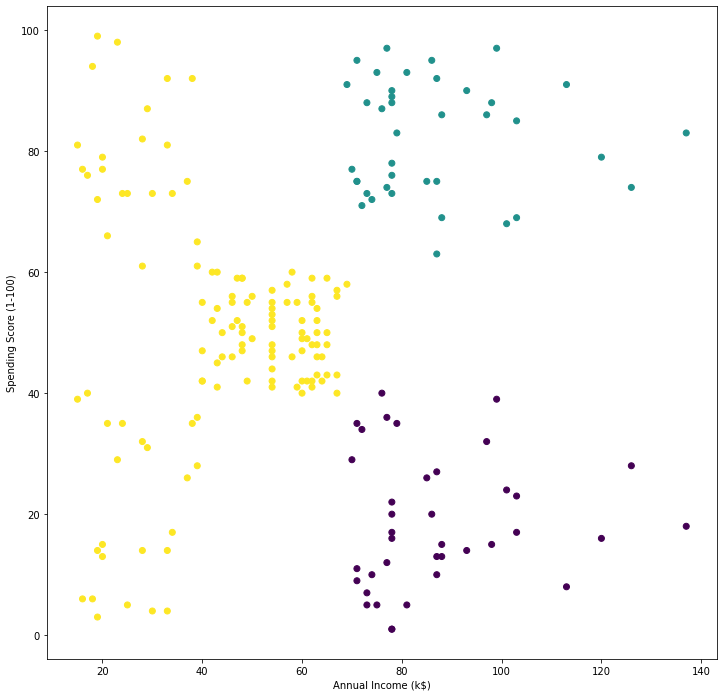

In [0]:
df_pandas_k3 = df_prediction_k3.toPandas().set_index('CustomerID')
df_pandas_k3.head()

plt.figure(figsize=(12,12))
plt.scatter(df_pandas_k3['Annual Income (k$)'], df_pandas_k3['Spending Score (1-100)'], c=df_pandas_k3.prediction)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Pergunta 14

*Sobre o processo de clusterização, é INCORRETO afirmar:*

In [0]:
pass

# Pergunta 15

Analisando, novamente, a clusterização dos clientes em cinco grupos, através das variáveis “Spending Score” e “Annual Income”, é INCORRETO afirmar:

In [0]:
pass